**Case Study**

 To study the survival classification on Titanic Dataset

In [1]:
import pandas as pd
df=pd.read_csv("/content/Titanic data.csv")
df
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.shape

(891, 12)

In [3]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df["Embarked"].fillna("S",inplace = True)

In [6]:
df.isnull().sum().sum()

864

In [7]:
d=df.drop(["Cabin","Ticket"],axis=1)

**Filling Missing Values**

In [8]:
d["Age"].fillna(d["Age"].mean(),inplace=True)

In [9]:
d.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


 label encoding for categorical variable

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
d["Sex"]=le.fit_transform(d["Sex"])
d["Embarked"]=le.fit_transform(d["Embarked"])
d


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,30.0000,0


In [11]:
d["Sex"].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

In [12]:
d["Embarked"].value_counts()

Embarked
2    646
0    168
1     77
Name: count, dtype: int64

 **Visualisation**


<ipython-input-13-7e38fd1595ac>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Pclass",data=df,palette="Set1")


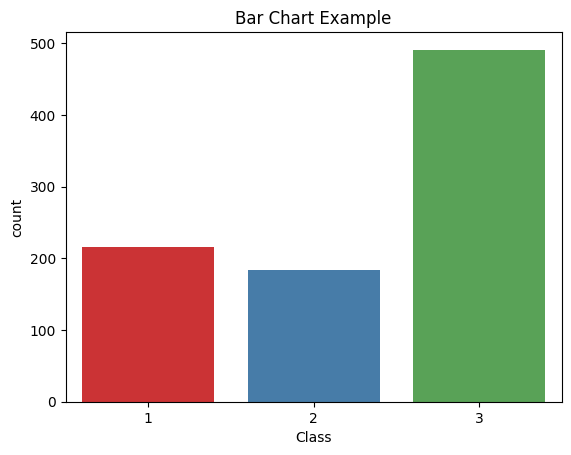

In [13]:
# Bar Plot: Shows the distribution of passengers across different classes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="Pclass",data=df,palette="Set1")
plt.title('Passenger count by class')
plt.xlabel('Class')
plt.ylabel('count')
plt.title('Bar Chart Example')
plt.show()

Pie-Chart

In [14]:
f_c=(d["Pclass"]==1).sum()
f_c
s_c=(d["Pclass"]==2).sum()
s_c
t_c=(d["Pclass"]==3).sum()
t_c

491

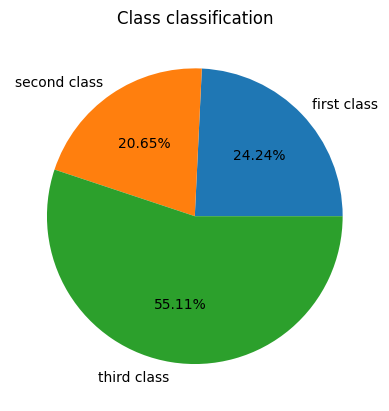

In [15]:
label=["first class","second class","third class"]
sizes=[f_c,s_c,t_c]
plt.pie(sizes,labels=label,autopct="%1.2f%%")
plt.title("Class classification")
plt.show()

Histogram

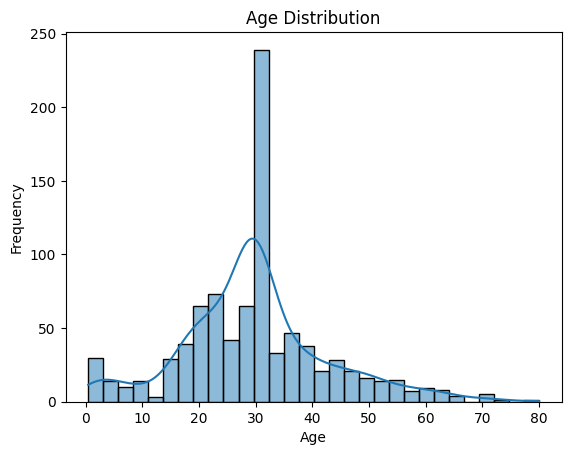

In [16]:
sns.histplot(d['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Box Plot: Compares fare distributions across different passenger classes.

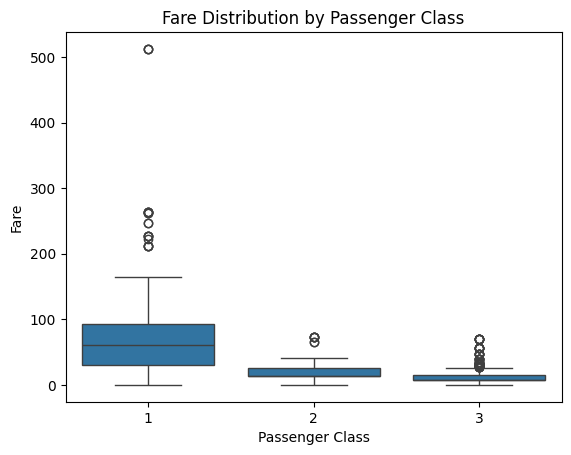

In [17]:
sns.boxplot(data=d, x='Pclass', y='Fare')
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

In [18]:
# Pie Chart: Illustrates the proportion of passengers who survived and those who did not
import plotly.express as px
survived_counts = d['Survived'].value_counts()
fig = px.pie(values=survived_counts, names=['Not Survived', 'Survived'], title='Survival Proportion')
fig.show()

Scatter Diagram

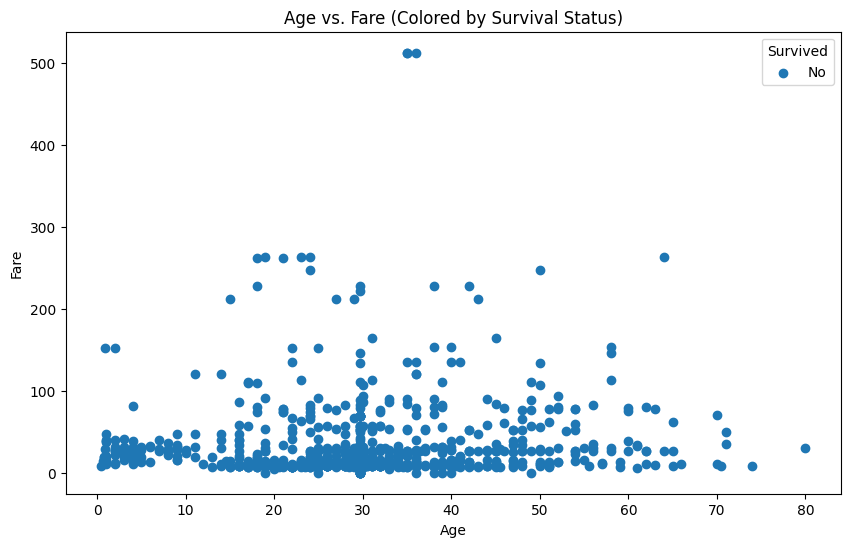

In [19]:
#This plot shows the relationship between age and fare, with points colored based on whether the passenger survived or not.
plt.figure(figsize=(10, 6))
plt.scatter(d['Age'],d['Fare'])
plt.title('Age vs. Fare (Colored by Survival Status)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [20]:
d1=d.drop(["Name"],axis=1)

In [21]:
d1.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.536476
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


**Model Building**

In [23]:
y=d["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [24]:
x=d.drop(columns=['Name','Survived'])
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.000000,1,0,7.2500,2
1,2,1,0,38.000000,1,0,71.2833,0
2,3,3,0,26.000000,0,0,7.9250,2
3,4,1,0,35.000000,1,0,53.1000,2
4,5,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000,2
887,888,1,0,19.000000,0,0,30.0000,2
888,889,3,0,29.699118,1,2,23.4500,2
889,890,1,1,26.000000,0,0,30.0000,0


 Train test

In [25]:
#Split Data into train test 80:20
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
len(x_test)

179

In [27]:
len(x_train)

712

In [28]:
x_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,332,1,1,45.500000,0,0,28.5000,2
733,734,2,1,23.000000,0,0,13.0000,2
382,383,3,1,32.000000,0,0,7.9250,2
704,705,3,1,26.000000,1,0,7.8542,2
813,814,3,0,6.000000,4,2,31.2750,2
...,...,...,...,...,...,...,...,...
106,107,3,0,21.000000,0,0,7.6500,2
270,271,1,1,29.699118,0,0,31.0000,2
860,861,3,1,41.000000,2,0,14.1083,2
435,436,1,0,14.000000,1,2,120.0000,2


In [29]:
y_train.shape

(712,)

In [30]:
x_train.shape

(712, 8)

In [31]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

Naive Bays Data on Train Data

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model=GaussianNB()

In [33]:
model.fit(x_train,y_train)

GaussianNB()

In [34]:
model.score(x_test,y_test)

0.776536312849162

In [35]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [36]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [37]:
y_pred = model.predict(x_test)
y_pred
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.776536312849162
Confusion Matrix:
 [[82 23]
 [17 57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       105
           1       0.71      0.77      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179



In [38]:
from sklearn.metrics import precision_score
pc=precision_score(y_test,y_pred)
pc

0.7125

In [39]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)
ac

0.776536312849162

In [40]:
from sklearn.metrics import recall_score
rc=recall_score(y_test,y_pred)
rc

0.7702702702702703

Intrpretation

Confusion matrix

83 observation which is not survive and correctly predicted.

57 observation which is survive and correctly predicted.

22 observation which is not survive and incorrectly predicted.

17 observation which is  survive and incorrectly predicted.

classification Report.




 **Dicision Tree**

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [42]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [43]:
y_pred = model.predict(x_test)
y_pred
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7597765363128491
Confusion Matrix:
[[84 21]
 [22 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80       105
           1       0.71      0.70      0.71        74

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



In [44]:
from sklearn.metrics import precision_score
pc=precision_score(y_test,y_pred)
pc

0.7123287671232876

In [45]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)
ac

0.7597765363128491

Intrpretation
Confusion matrix
 >  83 observation which is not survive and correctly predicted.

 >  57 observation which is survive and correctly predicted.

 >  22 observation which is not survive and incorrectly predicted.

 >17 observation which is  survive and incorrectly predicted.

 >  classification Report

**Knn Algorithm**

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [47]:
# Create and train the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
# Make predictions
y_pred = knn.predict(x_test)

In [48]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.659217877094972
Confusion Matrix:
[[89 16]
 [45 29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.85      0.74       105
           1       0.64      0.39      0.49        74

    accuracy                           0.66       179
   macro avg       0.65      0.62      0.62       179
weighted avg       0.66      0.66      0.64       179



In [49]:
from sklearn.metrics import precision_score
pc=precision_score(y_test,y_pred)
pc

0.6444444444444445

In [50]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)
ac

0.659217877094972

Intrpretation
 Confusion matrix
>  89 observation which is not survive and correctly predicted.

>  29 observation which is survive and correctly predicted.

>  16 observation which is not survive and incorrectly predicted.

>  4 observation which is  survive and incorrectly predicted.

>  classification Report

**camparison**

In [52]:
import pandas as pd
result={"Model":["Naive bays","KNN","Decision Tree"],"Accuracy":[0.7765,0.6592,0.7821],"Precision":[0.7215,0.7183,0.6444],"Recall":[0.7821,0.7557,0.6592]}
pd.DataFrame(result)

,Model,Accuracy,Precision,Recall
0,Naive bays,0.7765,0.7215,0.7821
1,KNN,0.6592,0.7183,0.7557
2,Decision Tree,0.7821,0.6444,0.6592


**Analysis**

Accuracy: Decision Tree and Naive Bayes models have the highest accuracy, with Naive Bayes slightly edging out Decision Tree.

Precision: Naive Bayes has the highest precision, followed closely by KNN. Decision Tree has the lowest precision among the models.

Recall: Naive Bayes has the highest recall, followed by KNN. Decision Tree has the lowest recall among the models.